In [292]:
#importing libraries
#Dataset 1
import pandas as pd
import csv
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import tqdm
import seaborn as sns
from keras.utils.vis_utils import plot_model
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import TimeDistributed
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [293]:
#reading csv
df_indc = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
df_indc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [148]:
df_indc.isnull()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
df_indc.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [150]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

In [151]:
df_indc.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


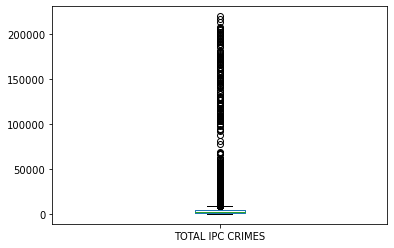

In [152]:
plot_boxplot(df_indc, "TOTAL IPC CRIMES")

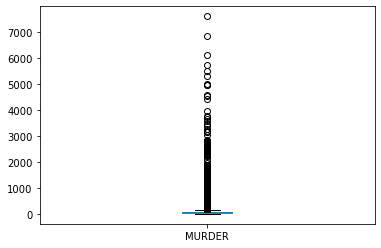

In [153]:
plot_boxplot(df_indc, "MURDER")

In [154]:
df_indc.corr()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
YEAR,1.000000,-0.013119,-0.001062,-0.004720,0.029702,-0.000197,0.029705,0.060192,0.074188,0.009021,...,-0.013729,0.004181,0.011401,0.014875,-0.010803,0.053751,-0.017585,0.042236,0.020397,0.019805
MURDER,-0.013119,1.000000,0.958120,0.781316,0.813854,0.150549,0.813831,0.835742,0.786340,0.804646,...,0.726786,0.736568,0.910127,0.727664,0.665953,0.710620,0.316327,0.795780,0.739604,0.846449
ATTEMPT TO MURDER,-0.001062,0.958120,1.000000,0.759359,0.778747,0.124546,0.778737,0.829043,0.783605,0.788250,...,0.690067,0.718512,0.910486,0.712849,0.614262,0.660295,0.306048,0.766365,0.759125,0.831710
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,-0.004720,0.781316,0.759359,1.000000,0.557073,0.073364,0.557076,0.737054,0.733246,0.598798,...,0.326293,0.345942,0.867301,0.427577,0.541452,0.551058,0.164427,0.508449,0.437657,0.519959
RAPE,0.029702,0.813854,0.778747,0.557073,1.000000,0.138948,1.000000,0.743485,0.728700,0.634529,...,0.744231,0.764797,0.729022,0.896128,0.498080,0.772843,0.256228,0.722206,0.793902,0.858241
CUSTODIAL RAPE,-0.000197,0.150549,0.124546,0.073364,0.138948,1.000000,0.138355,0.141543,0.130877,0.142684,...,0.115959,0.119203,0.117672,0.097177,0.068289,0.102754,0.024199,0.123451,0.106990,0.126149
OTHER RAPE,0.029705,0.813831,0.778737,0.557076,1.000000,0.138355,1.000000,0.743462,0.728682,0.634496,...,0.744223,0.764789,0.729012,0.896145,0.498080,0.772846,0.256235,0.722192,0.793904,0.858237
KIDNAPPING & ABDUCTION,0.060192,0.835742,0.829043,0.737054,0.743485,0.141543,0.743462,1.000000,0.981832,0.848661,...,0.604642,0.581316,0.843857,0.593960,0.460161,0.753506,0.242141,0.720095,0.661941,0.751826
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.074188,0.786340,0.783605,0.733246,0.728700,0.130877,0.728682,0.981832,1.000000,0.732876,...,0.574696,0.552603,0.811343,0.588423,0.439617,0.758667,0.154434,0.722735,0.644533,0.727661
KIDNAPPING AND ABDUCTION OF OTHERS,0.009021,0.804646,0.788250,0.598798,0.634529,0.142684,0.634496,0.848661,0.732876,1.000000,...,0.565989,0.543938,0.764045,0.489425,0.424483,0.586924,0.437718,0.567288,0.576764,0.667329


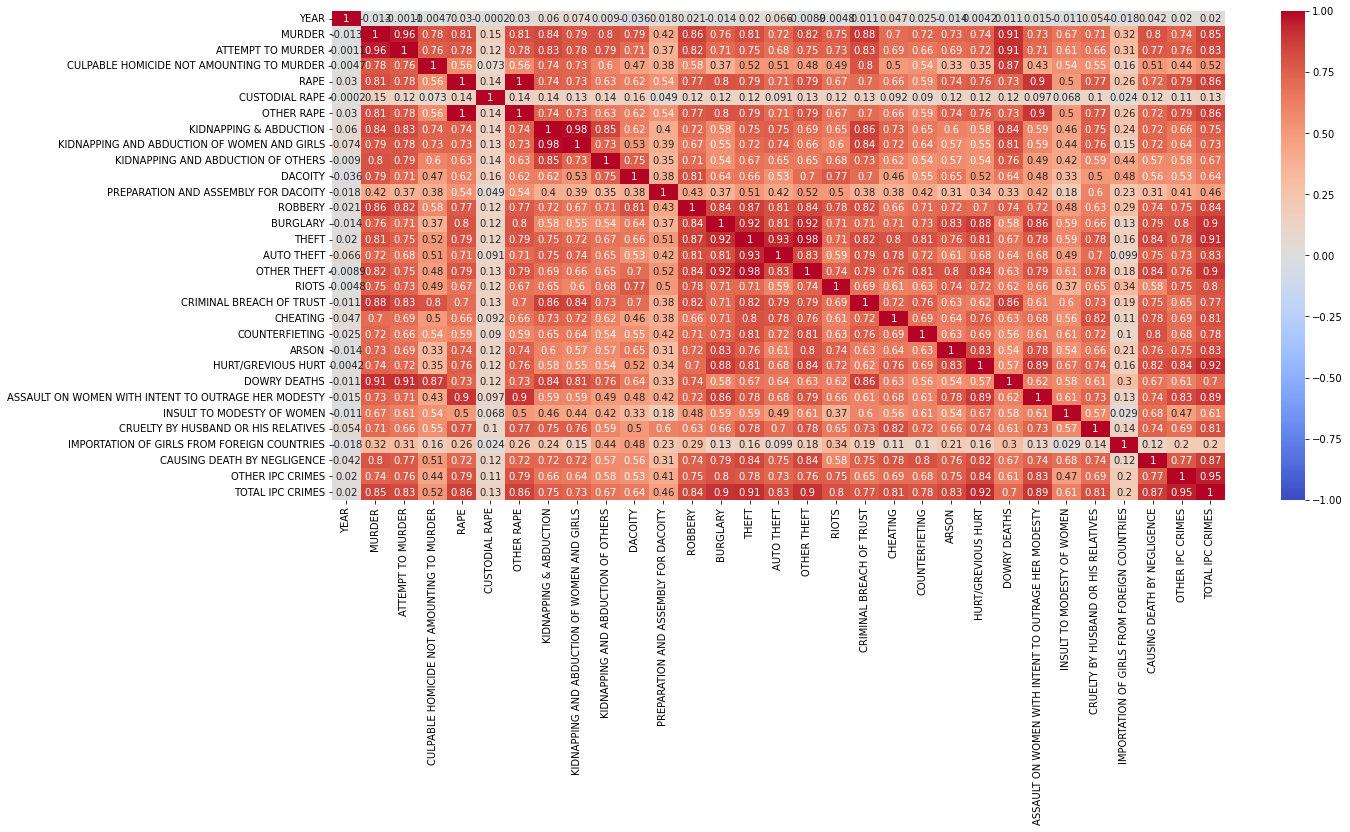

In [302]:
plt.figure(figsize = (20,9))
sns.heatmap(df_indc.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

In [156]:
df_indc.info

<bound method DataFrame.info of             STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                             

In [157]:
df_indc.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [158]:
total = df_indc[(df_indc["DISTRICT"] == "TOTAL")]
total.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
28,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,871,0,871,1182,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
42,ARUNACHAL PRADESH,TOTAL,2001,83,53,3,33,0,33,83,...,13,466,0,78,3,11,0,0,618,2342
70,ASSAM,TOTAL,2001,1356,481,40,817,0,817,1480,...,441,5805,59,850,4,1248,0,2010,9315,36877
115,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,502,7544,859,562,21,1558,83,2406,36667,88432
135,CHHATTISGARH,TOTAL,2001,880,529,45,959,0,959,207,...,215,5477,70,1763,161,840,0,689,15790,38460


In [159]:
df1=pd.read_csv('c1.csv')
df1

,Date,Per 100K Population,Annual % Change
0,31-12-1990,5.0570,NaN
1,31-12-1991,5.4500,7.77
2,31-12-1992,5.4644,0.26
3,31-12-1993,5.1700,-5.39
4,31-12-1994,5.0188,-2.92
5,31-12-1995,4.8122,-4.12
6,31-12-1996,4.7754,-0.76
7,31-12-1997,4.7375,-0.79
8,31-12-1998,4.8350,2.06
9,31-12-1999,4.6029,-4.80


In [160]:
df2=pd.read_csv('c2.csv')
df2

,Date,Population,Annual % Change,Unnamed: 3
0,31-12-1950,357021100,NaN,NaN
1,31-12-1951,364922360,2.21,NaN
2,31-12-1952,372997188,2.21,NaN
3,31-12-1953,381227705,2.21,NaN
4,31-12-1954,389731406,2.23,NaN
...,...,...,...,...
146,31-12-2096,1557945219,-0.44,NaN
147,31-12-2097,1551000309,-0.45,NaN
148,31-12-2098,1543990229,-0.45,NaN
149,31-12-2099,1536933462,-0.46,NaN


In [161]:
df3=pd.read_csv('c3.csv')
df3

,Date,Unemployment Rate (%),Annual Change,Unnamed: 3,Unnamed: 4
0,31-12-1991,5.599,NaN,NaN,NaN
1,31-12-1992,5.727,0.13,NaN,NaN
2,31-12-1993,5.691,-0.04,NaN,NaN
3,31-12-1994,5.739,0.05,NaN,NaN
4,31-12-1995,5.755,0.02,NaN,NaN
5,31-12-1996,5.740,-0.01,NaN,NaN
6,31-12-1997,5.613,-0.13,NaN,NaN
7,31-12-1998,5.666,0.05,NaN,NaN
8,31-12-1999,5.736,0.07,NaN,NaN
9,31-12-2000,5.561,-0.18,NaN,NaN


In [162]:
df2_in=df2.dropna(axis=1)
df2_in

,Date,Population
0,31-12-1950,357021100
1,31-12-1951,364922360
2,31-12-1952,372997188
3,31-12-1953,381227705
4,31-12-1954,389731406
...,...,...
146,31-12-2096,1557945219
147,31-12-2097,1551000309
148,31-12-2098,1543990229
149,31-12-2099,1536933462


In [163]:
df3_in=df3.dropna(axis=1)
df3_in

,Date,Unemployment Rate (%)
0,31-12-1991,5.599
1,31-12-1992,5.727
2,31-12-1993,5.691
3,31-12-1994,5.739
4,31-12-1995,5.755
5,31-12-1996,5.740
6,31-12-1997,5.613
7,31-12-1998,5.666
8,31-12-1999,5.736
9,31-12-2000,5.561


In [164]:
df_ind1=pd.merge(df1, df3_in)
df_ind1

,Date,Per 100K Population,Annual % Change,Unemployment Rate (%)
0,31-12-1991,5.4500,7.77,5.599
1,31-12-1992,5.4644,0.26,5.727
2,31-12-1993,5.1700,-5.39,5.691
3,31-12-1994,5.0188,-2.92,5.739
4,31-12-1995,4.8122,-4.12,5.755
5,31-12-1996,4.7754,-0.76,5.740
6,31-12-1997,4.7375,-0.79,5.613
7,31-12-1998,4.8350,2.06,5.666
8,31-12-1999,4.6029,-4.80,5.736
9,31-12-2000,4.5588,-0.96,5.561


In [165]:
df_ind=pd.merge(df1, df2_in)
df_ind

,Date,Per 100K Population,Annual % Change,Population
0,31-12-1990,5.0570,NaN,870452165
1,31-12-1991,5.4500,7.77,888941756
2,31-12-1992,5.4644,0.26,907574049
3,31-12-1993,5.1700,-5.39,926351297
4,31-12-1994,5.0188,-2.92,945261958
5,31-12-1995,4.8122,-4.12,964279129
6,31-12-1996,4.7754,-0.76,983281218
7,31-12-1997,4.7375,-0.79,1002335230
8,31-12-1998,4.8350,2.06,1021434576
9,31-12-1999,4.6029,-4.80,1040500054


<AxesSubplot:>

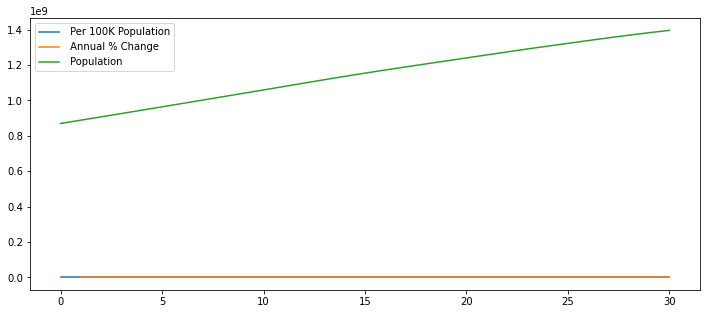

In [166]:
df_ind.plot(figsize=(12,5))

<AxesSubplot:>

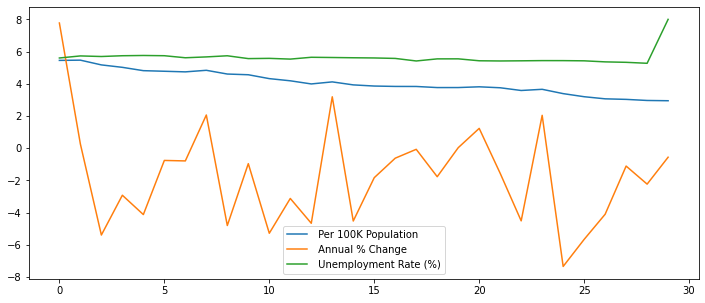

In [167]:
df_ind1.plot(figsize=(12,5))

In [168]:
total = df_indc[(df_indc["DISTRICT"] == "TOTAL")]
total.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
28,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,871,0,871,1182,...,872,34947,420,3544,2271,5791,7,7400,34344,130089
42,ARUNACHAL PRADESH,TOTAL,2001,83,53,3,33,0,33,83,...,13,466,0,78,3,11,0,0,618,2342
70,ASSAM,TOTAL,2001,1356,481,40,817,0,817,1480,...,441,5805,59,850,4,1248,0,2010,9315,36877
115,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,502,7544,859,562,21,1558,83,2406,36667,88432
135,CHHATTISGARH,TOTAL,2001,880,529,45,959,0,959,207,...,215,5477,70,1763,161,840,0,689,15790,38460


In [169]:
#creating csv for crime rates with respect to population

In [170]:
df_ind.to_csv('ind1.csv')

In [262]:
df_indcp = pd.read_csv('ind1.csv', index_col = 'Date', parse_dates = True).asfreq("D")
df_indcp



,Unnamed: 0,Per 100K Population,Annual % Change,Population
Date,,,,
1990-12-31,0.0,5.0570,NaN,8.704522e+08
1991-01-01,NaN,NaN,NaN,NaN
1991-01-02,NaN,NaN,NaN,NaN
1991-01-03,NaN,NaN,NaN,NaN
1991-01-04,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN,NaN


In [263]:
df_indcp.columns = ['Date', 'Per 100K Population', 'Annual % Change', 'Population']
df_indcp.dropna(axis=1)

""
Date
1990-12-31
1991-01-01
1991-01-02
1991-01-03
1991-01-04
...
2020-12-27
2020-12-28
2020-12-29


<AxesSubplot:xlabel='Date'>

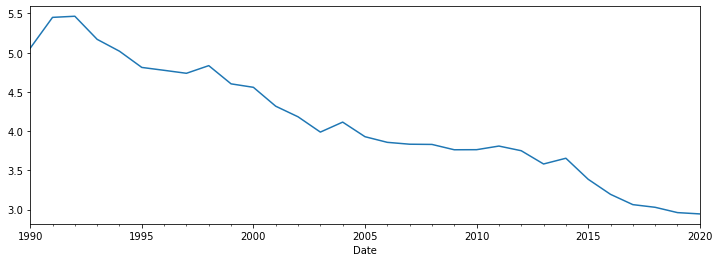

In [261]:
#exponential smoothing
df_indcp['Per 100K Population'].plot(figsize = (12,4))

In [254]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [264]:
HORIZON = 10
model = ExponentialSmoothing(endog = df_indcp['Per 100K Population'])
results=model.fit()
preds = results.get_forecast(steps= HORIZON)
preds.summary_frame(alpha= 0.2).head(3)

Per 100K Population,mean,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,2.9457,0.007998,2.935451,2.955950
2021-01-02,2.9457,0.011302,2.931216,2.960184
2021-01-03,2.9457,0.013839,2.927965,2.963435


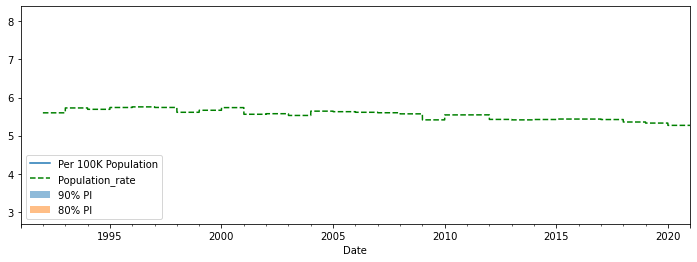

In [304]:
ax = df_indcp['Per 100K Population'].plot(figsize = (12,4))
forecast_80 = preds.summary_frame(alpha = 0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha = 0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha =0.5, label = '90% PI');
ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha =0.5, label = '80% PI');

results.fittedvalues.plot(ax=ax, label = 'Population_rate', color = 'green', linestyle='--')
ax.legend(loc=3);

In [266]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Exponential Smoothing Results                         
===============================================================================
Dep. Variable:     Per 100K Population   No. Observations:                10959
Model:                    ETS(A, N, N)   Log Likelihood                  17.235
Date:                 Tue, 06 Dec 2022   AIC                            -28.471
Time:                         17:16:59   BIC                             -6.565
Sample:                     12-31-1990   HQIC                           -21.089
                          - 12-31-2020   Scale                            0.000
Covariance Type:                   opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9985      1.180      0.846      0.397      -1.314       3.311
initial_level       5.0570     50.111      0.101      0.920     -93.159     103.273
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         524707945.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -8.68
Prob(H) (two-sided):                  0.00   Kurtosis:                      1074.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

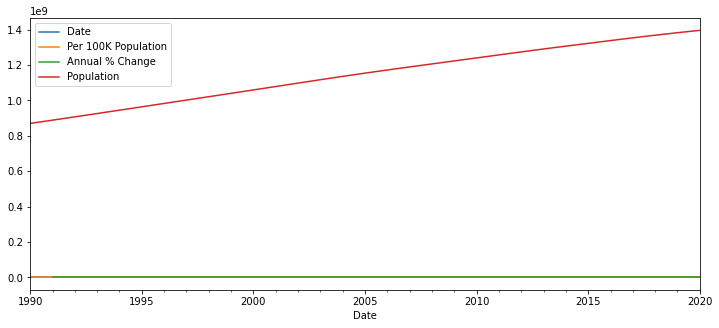

In [186]:
df_indcp.plot(figsize=(12,5))

In [187]:
#statistical tests
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_indcp['Per 100K Population'])

1. ADF :  -0.0847047944442477
2. P-Value :  0.9509408452936026
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 30
5. Critical Values :
	 1% :  -3.6699197407407405
	 5% :  -2.9640707407407407
	 10% :  -2.621171111111111


In [188]:
#Transformation of the dataset to make it stationary 
df_ind_log=np.sqrt(df_indcp['Per 100K Population'])
df_ind_diff=df_ind_log.diff().dropna()

In [189]:
result=adfuller (df_ind_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -2.541747
p-value: 0.105644
Critical values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


In [190]:
ip = np.asarray(df_indcp['Per 100K Population'].values)
ip = np.asarray([[i] for i in ip])
ip

array([[5.057 ],
       [5.45  ],
       [5.4644],
       [5.17  ],
       [5.0188],
       [4.8122],
       [4.7754],
       [4.7375],
       [4.835 ],
       [4.6029],
       [4.5588],
       [4.3181],
       [4.1832],
       [3.9883],
       [4.1155],
       [3.9295],
       [3.8577],
       [3.8338],
       [3.8311],
       [3.7631],
       [3.7641],
       [3.8103],
       [3.7509],
       [3.5819],
       [3.6551],
       [3.3869],
       [3.1951],
       [3.064 ],
       [3.03  ],
       [2.9624],
       [2.9457]])

In [191]:
predictors = df_indcp.iloc[:,0:1]
response = df_indcp.iloc[:,1]

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, response, test_size=0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(24, 1) (24,)
(7, 1) (7,)


In [193]:
kerasmodel = Sequential()
kerasmodel.add(Dense(8, input_dim=1, activation = 'relu'))
kerasmodel.add(Dense(2, activation = 'relu'))
kerasmodel.add(Dense(1, activation = 'sigmoid'))
kerasmodel.add(Flatten())

In [194]:
kerasmodel.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [195]:
kerasmodel.fit(X_train, Y_train, epochs=10, batch_size = 10)

Epoch 1/10
3/3 [==============================] - 2s 12ms/step - loss: -11.5056 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: -12.1078 - accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: -12.6861 - accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: -13.2846 - accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: -13.8955 - accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: -14.5160 - accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: -15.1096 - accuracy: 0.0000e+00
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: -15.7167 - accuracy: 0.0000e+00
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: -16.3434 - accuracy: 0.0000e+00
Epoch 10/10
3/3 [==============================] - 0s 6ms/step - loss: -16.9949 -

In [202]:
_, accuracy = kerasmodel.evaluate(X_train, Y_train)
print('train accuracy:%.2f'% (accuracy*100))

1/1 [==============================] - 0s 371ms/step - loss: -17.4534 - accuracy: 0.0000e+00
train accuracy:0.00


In [196]:
#Linear Regression

In [197]:
LiRe= LinearRegression()
LiRe.fit(X_train, Y_train)

LinearRegression()

In [198]:
Y_predict=LiRe.predict(X_test)
print(Y_predict)
print(Y_test)

[3.10172862 3.81259314 4.68142756 4.44447272 3.89157809 4.36548777
 4.12853293]
Date
2018-12-31    3.0300
2009-12-31    3.7631
1998-12-31    4.8350
2001-12-31    4.3181
2008-12-31    3.8311
2002-12-31    4.1832
2005-12-31    3.9295
Name: Per 100K Population, dtype: float64


In [199]:
print('coeficient of determination: %.3f' % r2_score(Y_test, Y_predict))

coeficient of determination: 0.934


In [200]:
#MSE
from sklearn import metrics
metrics.mean_squared_error(Y_test, Y_predict)

0.01766423752497112

In [201]:
#RMSE
mean_sq_err = metrics.mean_squared_error(Y_test, Y_predict)
np.sqrt(mean_sq_err)

0.13290687538638143

In [203]:
Y_test, Y_predict.mean()

(Date
 2018-12-31    3.0300
 2009-12-31    3.7631
 1998-12-31    4.8350
 2001-12-31    4.3181
 2008-12-31    3.8311
 2002-12-31    4.1832
 2005-12-31    3.9295
 Name: Per 100K Population, dtype: float64,
 4.060831546945854)

In [204]:
#creating csv for crime rates with respect to an unemployment

In [205]:
df_ind1.to_csv('ind2.csv')

In [279]:
df_indcp1 = pd.read_csv('ind2.csv', index_col = 'Date', parse_dates = True).asfreq("D")
df_indcp1
df_indcp1.columns = ['Date', 'Per 100K Population', 'Annual % Change', 'Unemployment Rate (%)']
df_indcp1.dropna(axis=1)


""
Date
1991-12-31
1992-01-01
1992-01-02
1992-01-03
1992-01-04
...
2020-12-27
2020-12-28
2020-12-29


In [268]:
#Neural Network
ip = np.asarray(df_indcp1['Unemployment Rate (%)'].values)
ip = np.asarray([[i] for i in ip])
ip

array([[5.599],
       [  nan],
       [  nan],
       ...,
       [  nan],
       [  nan],
       [7.997]])

In [269]:
predictors = df_indcp1.iloc[:,0:1]
response = df_indcp1.iloc[:,1]

In [270]:
x_train, x_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(8475, 1) (8475,)
(2119, 1) (2119,)


In [271]:
kerasmodel = Sequential()
kerasmodel.add(Dense(8, input_dim=1, activation = 'relu'))
kerasmodel.add(Dense(2, activation = 'relu'))
kerasmodel.add(Dense(1, activation = 'sigmoid'))
kerasmodel.add(Flatten())

In [272]:
kerasmodel.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [273]:
kerasmodel.fit(x_train, y_train, epochs=10, batch_size = 10)

Epoch 1/10
848/848 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
848/848 [==============================] - 1s 1ms/step - loss: nan - accuracy: 

<AxesSubplot:xlabel='Date'>

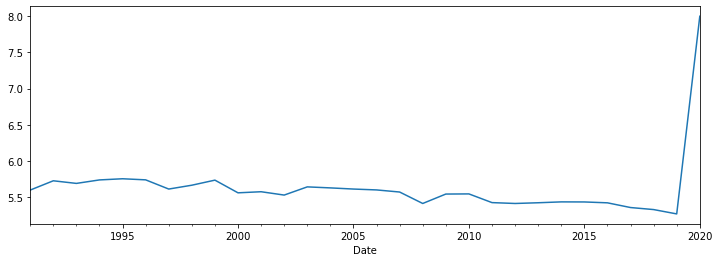

In [278]:
#Exponential smoothing
df_indcp1['Unemployment Rate (%)'].plot(figsize = (12,4))

In [280]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [281]:
HORIZON = 10
model = ExponentialSmoothing(endog = df_indcp1['Unemployment Rate (%)'])
results=model.fit()
preds = results.get_forecast(steps= HORIZON)
preds.summary_frame(alpha= 0.2).head(3)

Unemployment Rate (%),mean,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,7.996912,0.026607,7.962813,8.031010
2021-01-02,7.996912,0.037410,7.948969,8.044854
2021-01-03,7.996912,0.045728,7.938309,8.055514


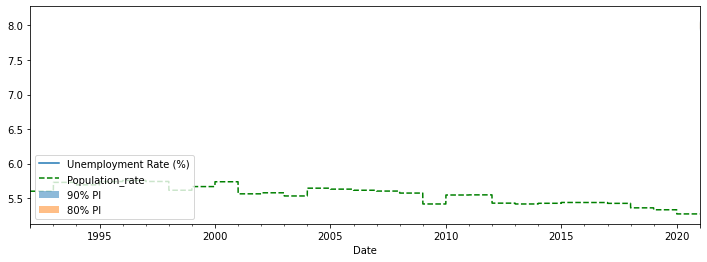

In [303]:
ax = df_indcp1['Unemployment Rate (%)'].plot(figsize = (12,4))
forecast_80 = preds.summary_frame(alpha = 0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha = 0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
ax.fill_between(forecast_90.index,forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha =0.5, label = '90% PI');
ax.fill_between(forecast_80.index,forecast_80['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha =0.5, label = '80% PI');

results.fittedvalues.plot(ax=ax, label = 'Population_rate', color = 'green', linestyle='--')
ax.legend(loc=3);

In [283]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Exponential Smoothing Results                          
=================================================================================
Dep. Variable:     Unemployment Rate (%)   No. Observations:                10594
Model:                      ETS(A, N, N)   Log Likelihood                 -18.991
Date:                   Tue, 06 Dec 2022   AIC                             43.983
Time:                           17:21:31   BIC                             65.787
Sample:                       12-31-1991   HQIC                            51.342
                            - 12-31-2020   Scale                            0.001
Covariance Type:                     opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9884      1.398      0.707      0.480      -1.752       3.729
initial_level       5.5989     12.587      0.445      0.656     -19.071      30.269
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):       45544931380.55
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              99.46   Skew:                            99.70
Prob(H) (two-sided):                  0.00   Kurtosis:                     10158.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:
#Linear regression
LiRe= LinearRegression()
LiRe.fit(x_train, y_train)

LinearRegression()

In [225]:
y_predict=LiRe.predict(x_test)
print(y_predict)
print(y_test)

[5.15127242 4.91121704 2.91075553 3.31084783 3.23082937 2.99077399]
Date
1992-12-31    5.4644
1995-12-31    4.8122
2020-12-31    2.9457
2015-12-31    3.3869
2016-12-31    3.1951
2019-12-31    2.9624
Name: Per 100K Population, dtype: float64


In [226]:
print('coeficient of determination: %.3f' % r2_score(y_test, y_predict))

coeficient of determination: 0.980


In [227]:
#MSE
from sklearn import metrics
metrics.mean_squared_error(y_test, y_predict)

0.01948999569915526

In [228]:
#RMSE
mean_sq_err = metrics.mean_squared_error(y_test, y_predict)
np.sqrt(mean_sq_err)

0.13960657469888466